<a href="https://colab.research.google.com/github/PardhivAryan/My-Programs/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload your dataset.zip file


Saving dataset.zip to dataset.zip

  Extracted Files:
/content/fraud_data/data/2018-07-11.pkl
/content/fraud_data/data/2018-04-18.pkl
/content/fraud_data/data/2018-05-29.pkl
/content/fraud_data/data/2018-05-07.pkl
/content/fraud_data/data/2018-04-30.pkl
/content/fraud_data/data/2018-05-26.pkl
/content/fraud_data/data/2018-07-12.pkl
/content/fraud_data/data/2018-04-25.pkl
/content/fraud_data/data/2018-04-21.pkl
/content/fraud_data/data/2018-07-27.pkl
/content/fraud_data/data/2018-05-10.pkl
/content/fraud_data/data/2018-05-02.pkl
/content/fraud_data/data/2018-06-09.pkl
/content/fraud_data/data/2018-04-06.pkl
/content/fraud_data/data/2018-08-20.pkl
/content/fraud_data/data/2018-07-28.pkl
/content/fraud_data/data/2018-05-27.pkl
/content/fraud_data/data/2018-08-24.pkl
/content/fraud_data/data/2018-06-14.pkl
/content/fraud_data/data/2018-06-22.pkl
/content/fraud_data/data/2018-09-17.pkl
/content/fraud_data/data/2018-07-26.pkl
/content/fraud_data/data/2018-06-16.pkl
/content/fraud_data/data/2

<ipython-input-1-9f288a1e4b1d>:43: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.median(), inplace=True)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1902
           1       1.00      1.00      1.00        16

    accuracy                           1.00      1918
   macro avg       1.00      1.00      1.00      1918
weighted avg       1.00      1.00      1.00      1918

Confusion Matrix:
 [[1902    0]
 [   0   16]]


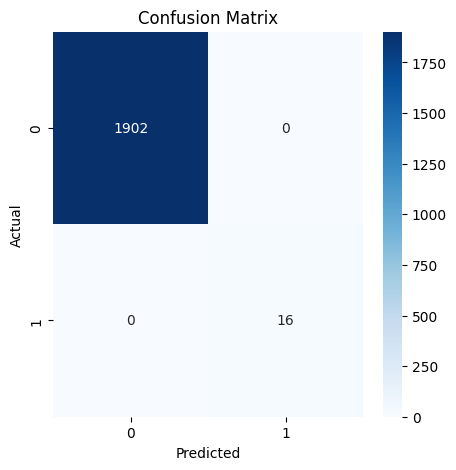

In [ ]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files
import zipfile
import os
import glob

#Uploading the dataset
print("Upload your dataset.zip file")
uploaded = files.upload()
zip_file = list(uploaded.keys())[0]
extract_path = "/content/fraud_data"
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("\n  Extracted Files:")
for root, dirs, files in os.walk(extract_path):
    for file in files:
        print(os.path.join(root, file))
file_paths = glob.glob(os.path.join(extract_path, "**", "*.csv"), recursive=True) + glob.glob(os.path.join(extract_path, "**", "*.pkl"), recursive=True)

if len(file_paths) == 0:
    raise FileNotFoundError("  No CSV or PKL file found. Please check the extracted folder.")
elif len(file_paths) == 1:
    file_path = file_paths[0]
    print(f"\n  Found file: {file_path}")
else:
    print("\n  Multiple files found. Using the first one.")
    file_path = file_paths[0]

if file_path.endswith('.csv'):
    df = pd.read_csv(file_path)
elif file_path.endswith('.pkl'):
    df = pd.read_pickle(file_path)
else:
    raise ValueError(f"Unsupported file format: {file_path}")
print("\n  Dataset Loaded Successfully!")

# Displaying First few rows
print(df.head())
df.fillna(df.median(), inplace=True)

categorical_cols = ["CUSTOMER_ID", "TERMINAL_ID"]
encoder = LabelEncoder()
for col in categorical_cols:
    if col in df.columns:
        df[col] = encoder.fit_transform(df[col])

X = df.drop(columns=["TX_FRAUD", "TRANSACTION_ID", "TX_DATETIME"], errors='ignore')
y = df["TX_FRAUD"]

# Splitting the testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Training the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test) # Making Predictions on model

accuracy = accuracy_score(y_test, y_pred) # Accuracy
print(f"\n Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred) #Confusion Matrix
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


